In [254]:
# Video Game Sales Analysis 

# Description:
#- Understanding video game sales and predicting it

# Model Type 
### KNN, XGB, Decision Tree, Random Forest, MLP Regressor, Linear Regression
#30/10/2022

# Version - V1.0 Beta


# Goals:
#- To get insights on Global video game sales
#- Understand the Top Publishers
#- Understand the Top Genres
#- Understand Sales by Continent 
#- Predict Sales 
#- Compare to stock shares, pick each publisher and check stock values at the time 



# Key Insights and Notes
#- The dataset ends around the end of 2016, you can try do complete the dataset using the scrapper on the description 
#- Some of the Consoles do not exist anymore
#- Might want to consider the Publisher sales 
#- Might want to consider the genres and check for outliers inside genres (Games outside of the scope that were a success)
#- Platforms change fast, so focusing on the platform needs to be in the short term, but we don't have this data 
#- Other_Sales might be a good prospecting market 


# Fixes
#-


# Version Updates:
#- 


# Future Implementations: 
#- 
#- Analyze data with Google Data 
#- Add Publisher x Year
#- Add New parameters such as Moving Average
#- Add sales from VR glasses, PC and Mobile 
#- Hyperparameters Optimization 


# Author - Luiz Gabriel Bongiolo

#Credits and References 
#- Code used to scrape the data - https://github.com/GregorUT/vgchartzScrape
#- https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot
#- https://plotly.com/python/text-and-annotations/



In [255]:
#Dataset description

# This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

# Rank - Ranking of overall sales

# Name - The games name

# Platform - Platform of the games release (i.e. PC,PS4, etc.)

# Year - Year of the game's release

# Genre - Genre of the game

# Publisher - Publisher of the game

# NA_Sales - Sales in North America (in millions)

# EU_Sales - Sales in Europe (in millions)

# JP_Sales - Sales in Japan (in millions)

# Other_Sales - Sales in the rest of the world (in millions)

# Global_Sales - Total worldwide sales.

In [256]:
#Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
import datetime


import warnings
warnings.simplefilter("ignore")


In [257]:
df = pd.read_csv("/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /vgsales.csv")

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [258]:
#Checking the data

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [259]:
#Check all lines that have a Null value
#We can use this to filter missing values and evaluate if they are relevant or if we should fix them manually  


df[df.isnull().any(axis = 1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [260]:
#Let's fill the missing year values with forward fill 

df['Year'] = df['Year'].fillna(method="ffill")



In [261]:
#Converting the Year to Integer Type

integer_year = {'Year': 'int'}
df['Year'] = df['Year'].astype(integer_year)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [262]:
#Check again 
df[df.isnull().any(axis = 1)]

#Now we can decide if we want to eliminate all NaN values or keep some of them 
#For example, wwe Smackdown vs. Raw 2006 has 3M Global Sales, is this relevant? It might be...
#Since the publisher might not be relevant for some of the analysis we are doing, we might consider to keep this values as NaN 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2008,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2008,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [263]:
#Lets remove all missing values 

df = df.dropna(axis=0)

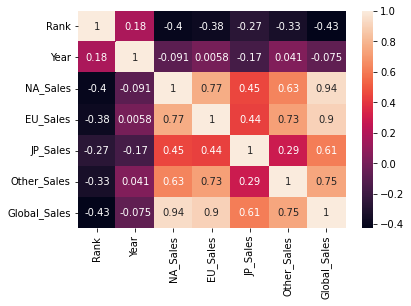

In [264]:
#Let's get some insights from the heatmap, we will come back to it later. 

sns.heatmap(df.corr(),annot=True)
plt.show()

In [265]:
top_sales = df.sort_values(by=['Global_Sales'], ascending=False).head(10)

top_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


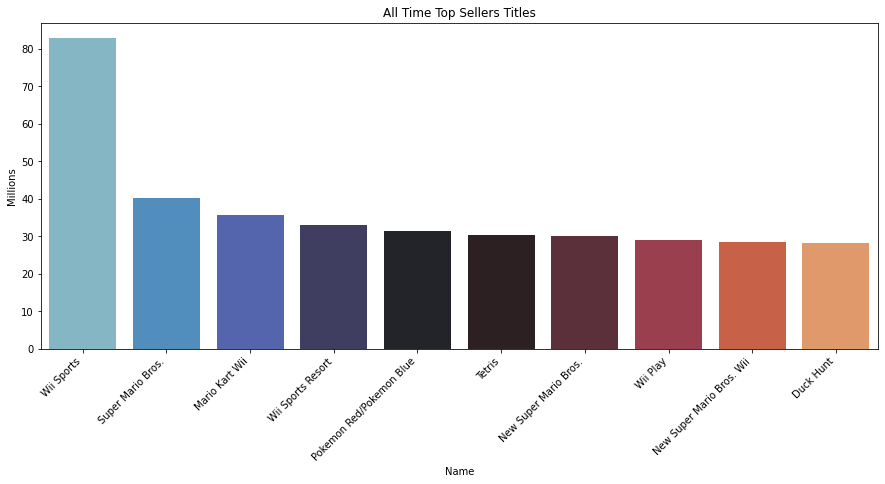

In [266]:
#Check Best Selling games of all time 

ax=plt.figure(figsize=(15,6))
sns.barplot(x="Name",y="Global_Sales", data=top_sales, palette='icefire')
plt.ylabel("Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('All Time Top Sellers Titles')

plt.show()

#Subplot Genres

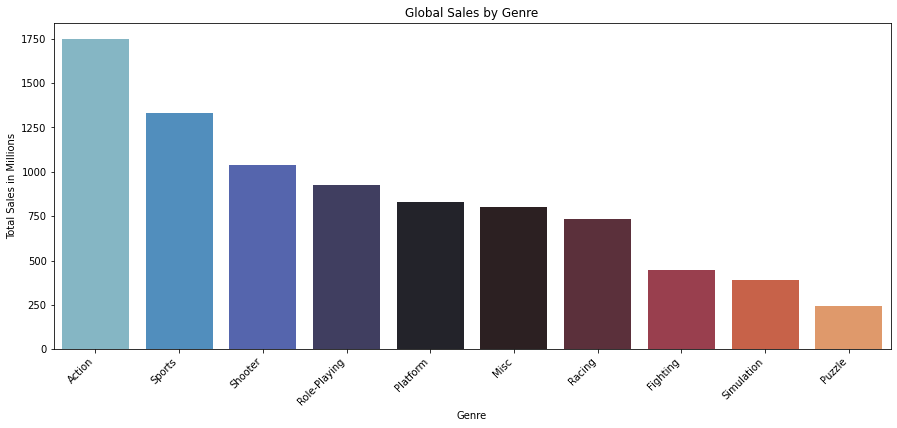

In [267]:
#Best Selling Genres 

top_genres = df.groupby(["Genre"]).agg({'Global_Sales':'sum'}).reset_index()

top_genres = top_genres.sort_values(by=["Global_Sales"], ascending=False).head(10)



bx=plt.figure(figsize=(15,6))
sns.barplot(x="Genre",y="Global_Sales", data=top_genres, palette='icefire')
plt.ylabel("Total Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Global Sales by Genre')

plt.show()

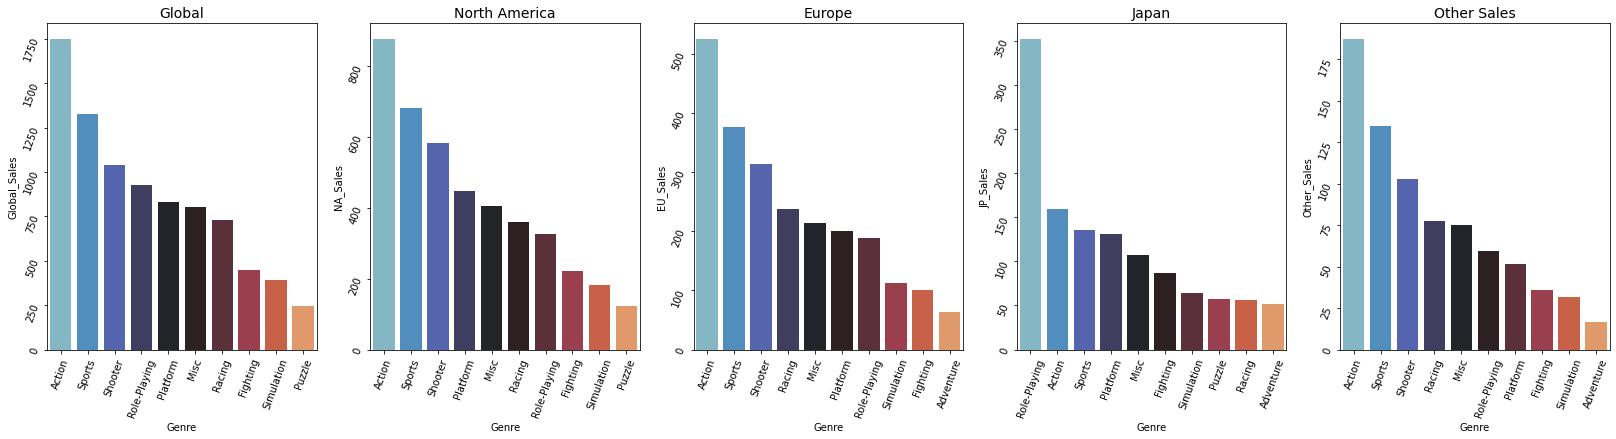

In [268]:
#Plot all Sales Charts in One 

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (28, 6))

sns.barplot(x="Genre",y="Global_Sales", ax=ax1, data=top_genres, palette='icefire').set_title("Global", fontsize = 14)
ax1.tick_params(labelrotation=70)

top_genresNA = df.groupby(["Genre"]).agg({'NA_Sales':'sum'}).reset_index()
top_genresNA = top_genresNA.sort_values(by=["NA_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="NA_Sales", ax=ax2, data=top_genresNA, palette='icefire', ci=None).set_title("North America", fontsize = 14)
ax2.tick_params(labelrotation=70)

top_genresEU = df.groupby(["Genre"]).agg({'EU_Sales':'sum'}).reset_index()
top_genresEU = top_genresEU.sort_values(by=["EU_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="EU_Sales", ax=ax3, data=top_genresEU, palette='icefire', ci=None).set_title("Europe", fontsize = 14)
ax3.tick_params(labelrotation=70)

top_genresJP = df.groupby(["Genre"]).agg({'JP_Sales':'sum'}).reset_index()
top_genresJP = top_genresJP.sort_values(by=["JP_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="JP_Sales", ax=ax4, data=top_genresJP, palette='icefire', ci=None).set_title("Japan", fontsize = 14)
ax4.tick_params(labelrotation=70)

top_genresOT = df.groupby(["Genre"]).agg({'Other_Sales':'sum'}).reset_index()
top_genresOT = top_genresOT.sort_values(by=["Other_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="Other_Sales", ax=ax5, data=top_genresOT, palette='icefire', ci=None).set_title("Other Sales", fontsize = 14)
ax5.tick_params(labelrotation=70)



In [269]:
#North America and Europe sell together much more than Japan
#Focusing on Japan Sales would be a challenge 

In [270]:
#Sort by year and platform Global Sales 

top_platforms = df.sort_values( by="Year", ascending=False)
top_platforms = top_platforms.groupby(["Year","Platform"]).agg({'Global_Sales':'sum'}).reset_index()


#Last 10 Years Platform Global Sales 
top_platforms.head(50)



,Year,Platform,Global_Sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
3,1983,2600,5.83
4,1983,NES,10.96
5,1984,2600,0.27
6,1984,NES,50.09
7,1985,2600,0.45
8,1985,DS,0.02
9,1985,NES,53.44


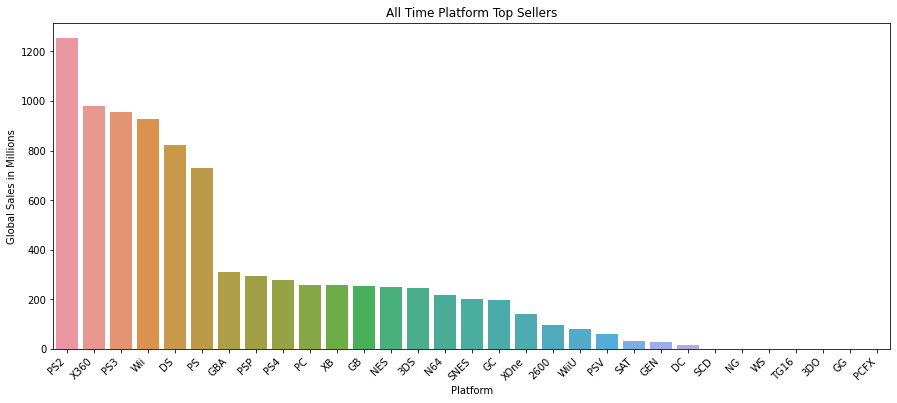

In [271]:
#All Time platform Global Sales 

top_platforms = df.groupby(["Platform"]).agg({'Global_Sales':'sum'}).reset_index()

top_platforms = top_platforms.sort_values( by="Global_Sales", ascending=False)

cx=plt.figure(figsize=(15,6))
sns.barplot(x="Platform",y="Global_Sales", data=top_platforms, ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time Platform Top Sellers")


plt.show()

Text(0.5, 1.0, 'All time Publisher Top Seller')

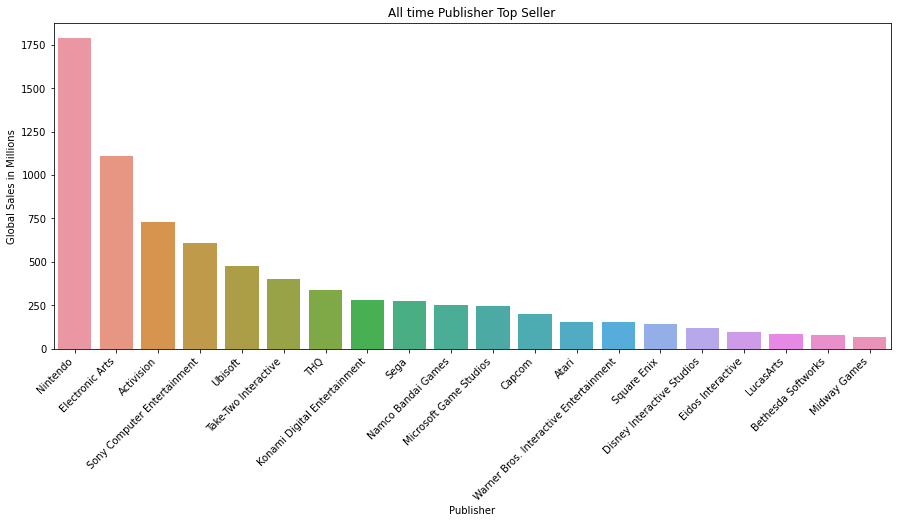

In [272]:
#All time Publisher Top seller


top_publisher = df.groupby(["Publisher"]).agg({'Global_Sales':'sum'}).reset_index()

top_publisher = top_publisher.sort_values(by="Global_Sales", ascending=False)


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Publisher",y="Global_Sales", data=top_publisher[:20], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All time Publisher Top Seller")



In [273]:
#Top Publisher per year - Selecting specific years


publisher_year = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

publisher_year = publisher_year.sort_values(by="Global_Sales", ascending=False)

publisher_year = publisher_year.loc[publisher_year["Year"] == 2006] #Select the year you want here 


publisher_year.head(10)

,Publisher,Year,Global_Sales
1508,Nintendo,2006,205.61
663,Electronic Arts,2006,62.37
1832,Sony Computer Entertainment,2006,33.81
1994,THQ,2006,24.97
2043,Take-Two Interactive,2006,20.59
111,Activision,2006,17.67
2165,Ubisoft,2006,17.27
1792,Sega,2006,15.83
1160,Konami Digital Entertainment,2006,14.60
1884,Square Enix,2006,13.43


In [274]:
#Top publisher for each year in history by Global Sales 

top_publisher_year = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

top_publisher_year = top_publisher_year[["Publisher", "Year", "Global_Sales"]].sort_values("Year", ascending=False)

top_publisher_year = top_publisher_year[["Publisher", "Year", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False)

top_publisher_year = top_publisher_year[["Publisher", "Year", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False).drop_duplicates(subset="Year")


# More elegant way of doing it 

#top_publisher_year = df[["Publisher", "Year", "Global_Sales"]].groupby("Year", as_index=False).apply(lambda df:df.sort_values("Global_Sales", ascending=False)
#.head(1)).droplevel(0).sort_values("Year", ascending=False)

top_publisher_year.head(50)

,Publisher,Year,Global_Sales
2176,Ubisoft,2020,0.29
1803,Sega,2017,0.04
673,Electronic Arts,2016,12.25
672,Electronic Arts,2015,45.42
1516,Nintendo,2014,48.65
670,Electronic Arts,2013,52.92
1514,Nintendo,2012,56.47
668,Electronic Arts,2011,72.25
667,Electronic Arts,2010,84.13
1511,Nintendo,2009,129.52


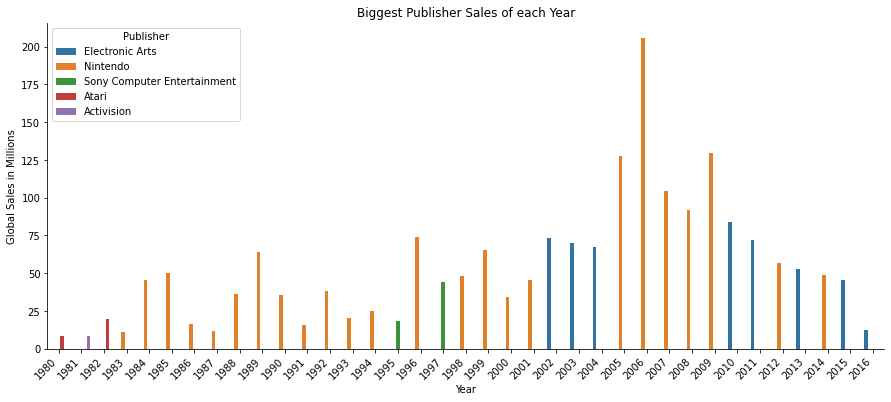

In [275]:
#Need to add a second label 


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=top_publisher_year[2:39], hue="Publisher")
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Biggest Publisher Sales of each Year")

sns.despine()

#Note that Ubisoft is at the top 5 Publishers of all time but never the biggest publisher of the year
#Atari is a big Publisher but never made the top 10 after the 80's, never recovered 
#Nintendo dominated the market for most of the time 
#We should consider Nintendo metrics, 
#Sony dominated during the first generation of consoles, we need more data to evaluate today's sales. 


In [276]:
#counts = publisher_10year['Publisher'].value_counts()

#publisher_10year['Publisher'] = publisher_10year['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

#publisher_10year

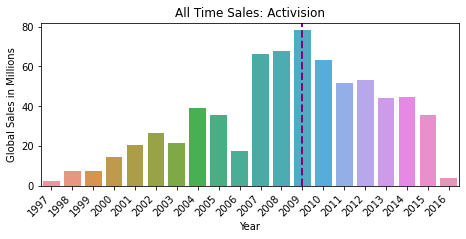

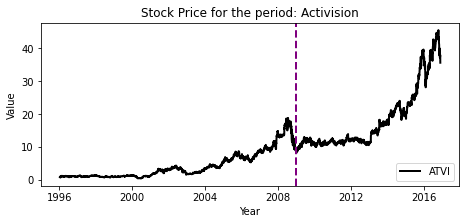

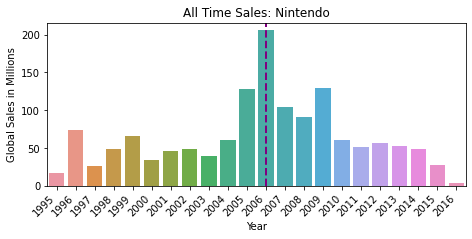

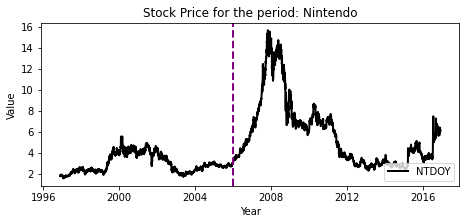

In [277]:
from pandas.plotting import register_matplotlib_converters        #This will fix: ConversionError: Failed to convert value(s) to axis units: '2022-05-01'
register_matplotlib_converters()


#Plotting Publisher All Time Sales  
company = "Activision"

publisher = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

publisher = publisher.loc[publisher["Publisher"] == company]

publisher


#Adding the Stock Chart 
import pandas_datareader as pdr

ticker = "ATVI"
start = "1996-01-12"
end = "2016-12-01"
stock = pdr.get_data_yahoo(ticker, start, end)
stock.drop(["Volume", "Adj Close"], axis=1, inplace=True)



#Plotting 
ax1=plt.figure(figsize=(7.5,3))
sns.barplot(x="Year",y="Global_Sales", data=publisher[12:], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time Sales: " + company)
plt.axvline( x = 12, color='purple', linestyle = "--", lw = 2)


ax2=plt.figure(figsize=(7.5,3))
plt.plot(stock["Close"],label = ticker, linewidth = 2, color = "black")
plt.title("Stock Price for the period: "+ company)
plt.xlabel("Year")
plt.ylabel("Value")
plt.axvline( x = "2009-01-01", color='purple', linestyle = "--", lw = 2)

plt.legend(loc = "lower right")
setup = dict(size = 14, color = "black")
plt.show()



#Plotting Publisher All Time Sales  
company2 = "Nintendo"

publisher2 = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

publisher2 = publisher2.loc[publisher2["Publisher"] == company2]

publisher2

#Adding the Stock Chart 

ticker2 = "NTDOY"
start2 = "1996-01-12"
end2 = "2016-12-01"
stock2 = pdr.get_data_yahoo(ticker2, start2, end2)
stock2.drop(["Volume", "Adj Close"], axis=1, inplace=True)


#Plotting
ax3=plt.figure(figsize=(7.5,3))
sns.barplot(x="Year",y="Global_Sales", data=publisher2[12:], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time Sales: " + company2)
plt.axvline( x = 11, color='purple', linestyle = "--", lw = 2)



ax4=plt.figure(figsize=(7.5,3))
plt.plot(stock2["Close"], label = ticker2, linewidth = 2, color = "black")
plt.title("Stock Price for the period: "+ company2)
plt.xlabel("Year")
plt.ylabel("Value")
plt.axvline( x = "2006-01-01", color='purple', linestyle = "--", lw = 2)

plt.legend(loc = "lower right")
setup2 = dict(size = 14, color = "black")
plt.show()


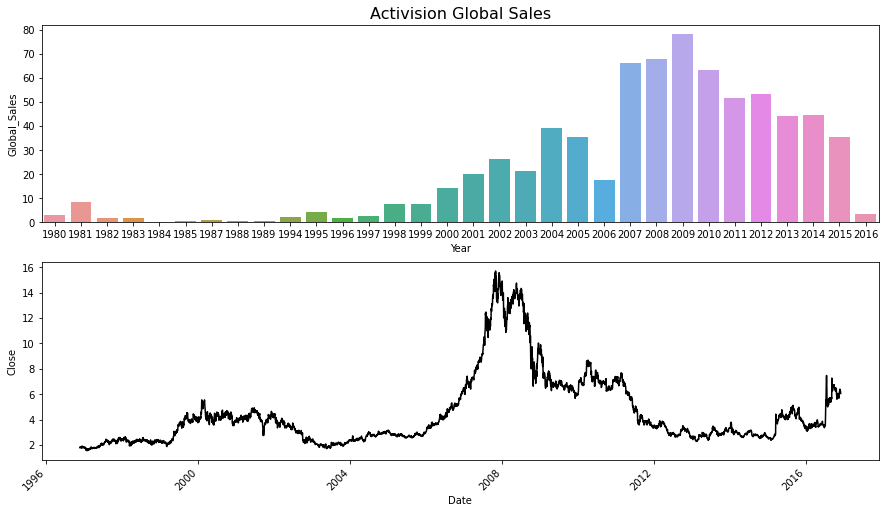

In [278]:
#Finding a better plot 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8)) 

sns.barplot("Year", "Global_Sales"
                , data = publisher, ax = ax1, ci=None).set_title(company+ " Global Sales", fontsize = 16)
plt.xticks(rotation=45, horizontalalignment='right')

sns.lineplot(stock2.index, "Close"
                , data = stock2, ax = ax2, color = "black")


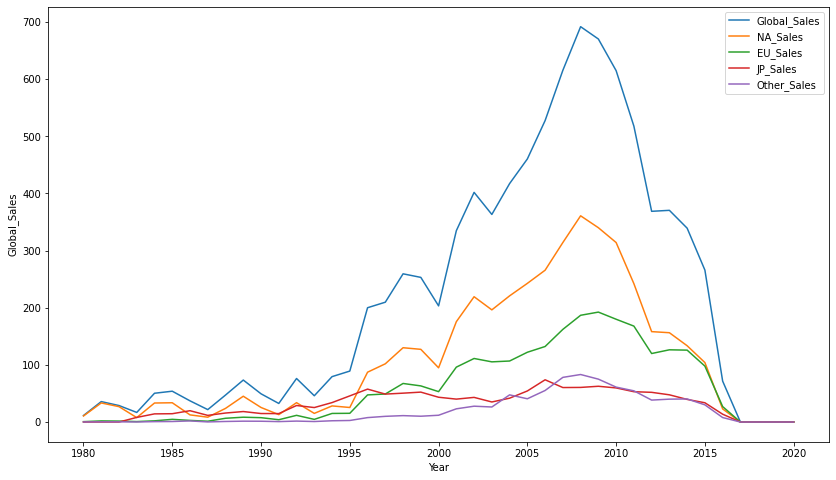

In [279]:
#Evolution of Markets 

data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
NA_year = df.groupby(by=['Year'])['NA_Sales'].sum()
NA_year = NA_year.reset_index()
EU_year = df.groupby(by=['Year'])['EU_Sales'].sum()
EU_year = EU_year.reset_index()
JP_year = df.groupby(by=['Year'])['JP_Sales'].sum()
JP_year = JP_year.reset_index()
Other_year = df.groupby(by=['Year'])['Other_Sales'].sum()
Other_year = Other_year.reset_index()
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=data_year, x='Year', y='Global_Sales', label='Global_Sales', ax=ax)
sns.lineplot(data=NA_year, x='Year', y='NA_Sales', label='NA_Sales', ax=ax)
sns.lineplot(data=EU_year, x='Year', y='EU_Sales', label='EU_Sales', ax=ax)
sns.lineplot(data=JP_year, x='Year', y='JP_Sales', label='JP_Sales', ax=ax)
sns.lineplot(data=Other_year, x='Year', y='Other_Sales', label='Other_Sales', ax=ax)

In [280]:
#Nintendo Stock vs Sales Insights 
#There is a delay between company's Global Sales to the company's stock price increase
#Global Sales lead to a increase of stock shares price, not necesserarily followed for same increase of sales 







In [281]:
#Checking the top publisher's to use in "publisher_genre ="

top_publisher.Publisher.unique()[:10]

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games'], dtype=object)

In [282]:
#Getting insights on Publisher's Top Genre's Sales for each year

publisher_genre = "Nintendo"

publisher_genre_sales = df.groupby(["Publisher","Year","Genre", "Name"]).agg({'Global_Sales':'sum'}).reset_index()

publisher_genre_sales = publisher_genre_sales.loc[publisher_genre_sales["Publisher"] == publisher_genre]

publisher_genre_sales = publisher_genre_sales[["Publisher", "Year","Genre","Name", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False).drop_duplicates(subset="Year")

#publisher_genres_all = publisher_genre_sales[["Publisher", "Year","Genre","Global_Sales"]].groupby("Year", as_index=False).apply(lambda df:df.sort_values("Global_Sales", ascending=False).head(1)).droplevel(0).sort_values("Year", ascending=False)

publisher_genre_sales.set_index(["Year"], inplace=True)

publisher_genre_sales.head(50)

,Publisher,Genre,Name,Global_Sales
Year,,,,
2016,Nintendo,Action,The Legend of Zelda: Twilight Princess HD,0.94
2015,Nintendo,Shooter,Splatoon,4.57
2014,Nintendo,Fighting,Super Smash Bros. for Wii U and 3DS,12.47
2013,Nintendo,Role-Playing,Pokemon X/Pokemon Y,14.35
2012,Nintendo,Platform,New Super Mario Bros. 2,9.82
2011,Nintendo,Racing,Mario Kart 7,12.21
2010,Nintendo,Role-Playing,Pokemon Black/Pokemon White,15.32
2009,Nintendo,Sports,Wii Sports Resort,33.00
2008,Nintendo,Racing,Mario Kart Wii,35.82


In [283]:
#Getting insights on Publisher's Top 3 Genre's for each year

publisher = "Nintendo"

nintendo_year = df.groupby(["Publisher","Year","Genre"]).agg({'Global_Sales':'sum'}).reset_index()

nintendo_year = nintendo_year.loc[nintendo_year["Publisher"] == publisher]

nintendo_year = nintendo_year[["Publisher", "Year","Genre","Global_Sales"]].groupby("Year", as_index=False).apply(lambda df:df.sort_values("Global_Sales", ascending=False).head(3)).droplevel(0).sort_values("Year", ascending=False)

nintendo_year = nintendo_year[["Publisher", "Year","Genre", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False)

nintendo_year.set_index(["Year"], inplace=True)

nintendo_year.head(20)

,Publisher,Genre,Global_Sales
Year,,,
2016,Nintendo,Action,3.05
2016,Nintendo,Shooter,0.35
2016,Nintendo,Strategy,0.05
2015,Nintendo,Role-Playing,5.56
2015,Nintendo,Platform,5.24
2015,Nintendo,Shooter,4.57
2014,Nintendo,Role-Playing,18.79
2014,Nintendo,Fighting,12.47
2014,Nintendo,Racing,6.96


In [284]:
nintendo_year.Genre.value_counts()

Platform        26
Role-Playing    14
Racing          12
Action          11
Sports           9
Fighting         6
Misc             6
Puzzle           6
Shooter          5
Simulation       3
Strategy         2
Adventure        2
Name: Genre, dtype: int64

In [285]:
import plotly.express as px


fig = px.bar(nintendo_year, x=nintendo_year.index, y=nintendo_year.Global_Sales, color=nintendo_year.Genre, title= publisher + " Top 3 Genres per Year")

fig.show()

In [286]:
#Top Genres Global Sales for each year 

publisher_genres_all = df[["Publisher", "Year","Genre","Global_Sales"]].groupby("Year", as_index=False).apply(lambda df:df.sort_values("Global_Sales", ascending=False).head(1)).droplevel(0).sort_values("Year", ascending=False)

publisher_genres_all.set_index(["Year"], inplace=True)


publisher_genres_all.head(20)

,Publisher,Genre,Global_Sales
Year,,,
2020,Ubisoft,Simulation,0.29
2017,Sega,Role-Playing,0.03
2016,Electronic Arts,Sports,4.77
2015,Activision,Shooter,14.24
2014,Take-Two Interactive,Action,11.98
2013,Take-Two Interactive,Action,21.40
2012,Activision,Shooter,14.03
2011,Activision,Shooter,14.76
2010,Microsoft Game Studios,Misc,21.82


In [287]:
fig = px.bar(publisher_genres_all, x=publisher_genres_all.index, y=publisher_genres_all.Global_Sales, color=publisher_genres_all.Genre, 
            title= "Top Genres Global Sales per Year", text="Publisher")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8)

fig.show()

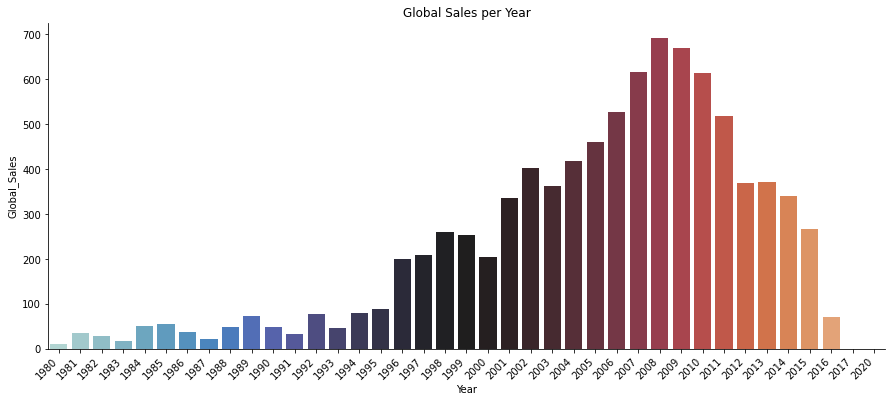

In [288]:
#Global Sales per Year

year = df.groupby(["Year"]).agg({'Global_Sales':'sum'}).reset_index()
year = year.sort_values(by="Global_Sales", ascending=False)


dx = plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=year, palette='icefire')
plt.title("Global Sales per Year")
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine()

#Data here might be missing plus we don't have data from new consoles or PC

In [289]:
#Platform Global Sales per year

platform_year = df.groupby(["Platform","Year"]).agg({'Global_Sales':'sum'}).reset_index()


#Picking an specific platform 
platform_year.head(10)

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.66
7,2600,1987,1.98
8,2600,1988,0.75
9,2600,1989,0.62


In [290]:
#Pair Plot 

#sns.pairplot(df, palette = "light:#5A9", kind="reg") 
#plt.show()

#Other Sales x Year might be a good prospecting market since there is a increase of technology and accessibility to emerging markets 
#Removing Years outliers might be a good idea when prospecting markets 


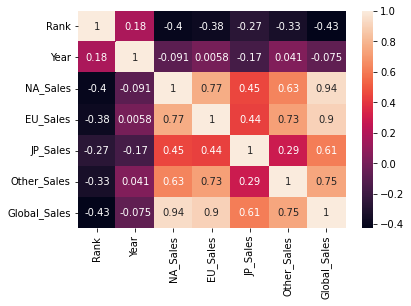

In [291]:
sns.heatmap(df.corr(),annot=True)
plt.show()

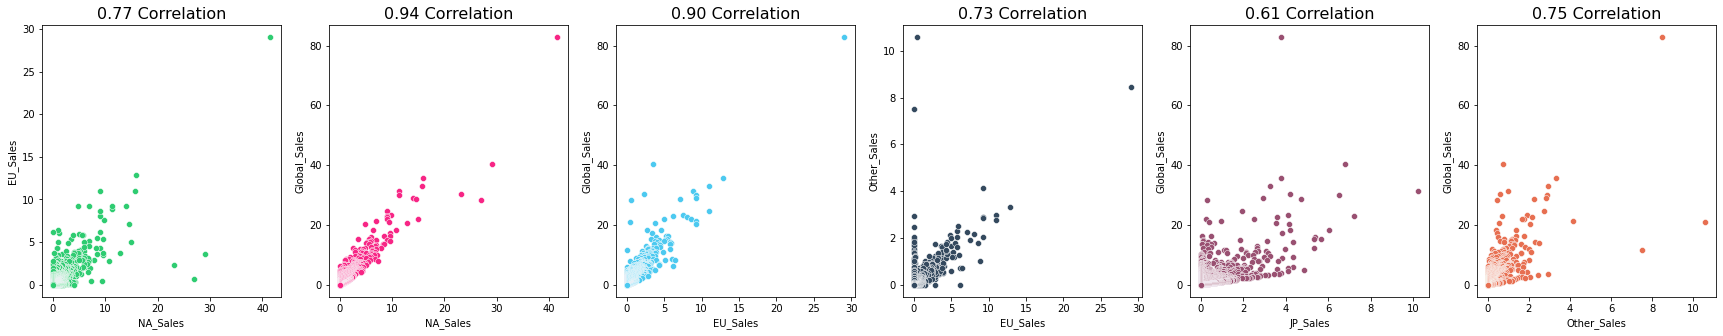

In [292]:
# Checking specific Correlations 

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 5)) 

sns.scatterplot("NA_Sales", "EU_Sales"
                , data = df, ax = ax1, color = "#2ecc71").set_title("0.77 Correlation", fontsize = 16);
sns.scatterplot("NA_Sales", "Global_Sales"
                , data = df, ax = ax2, color = "#F72585").set_title("0.94 Correlation", fontsize = 16);
sns.scatterplot("EU_Sales", "Global_Sales"
                , data = df, ax = ax3, color = "#4CC9F0").set_title("0.90 Correlation", fontsize = 16);
sns.scatterplot("EU_Sales", "Other_Sales"
                , data = df, ax = ax4, color = "#34495e").set_title("0.73 Correlation", fontsize = 16);
sns.scatterplot("JP_Sales", "Global_Sales"
                , data = df, ax = ax5, color = "#995071").set_title("0.61 Correlation", fontsize = 16);
sns.scatterplot("Other_Sales", "Global_Sales"
                , data = df, ax = ax6, color = "#E76F51").set_title("0.75 Correlation", fontsize = 16);
plt.show();

In [293]:
#Creating a new df just with useful information - We can convert the Genre to be used in the ML 


df_clean = df.drop(["Rank","Name","Publisher", "Platform"], axis=1)

df_clean = df_clean.sort_values(["Year"])

df_clean

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,1980,Misc,0.22,0.01,0.00,0.00,0.24
2669,1980,Fighting,0.72,0.04,0.00,0.01,0.77
258,1980,Shooter,4.00,0.26,0.00,0.05,4.31
1766,1980,Misc,1.07,0.07,0.00,0.01,1.15
5366,1980,Action,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...
16260,2016,Action,0.01,0.00,0.00,0.00,0.01
16438,2017,Action,0.00,0.00,0.01,0.00,0.01
14390,2017,Role-Playing,0.00,0.00,0.03,0.00,0.03
16241,2017,Role-Playing,0.00,0.00,0.01,0.00,0.01


In [294]:
df_clean.Genre.unique()

array(['Misc', 'Fighting', 'Shooter', 'Action', 'Sports', 'Racing',
       'Puzzle', 'Platform', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [295]:
df_clean = df_clean[["Year","NA_Sales","EU_Sales","JP_Sales", "Other_Sales", "Global_Sales"]].sort_values("Year", ascending=False)

df_clean = df_clean[["Year","NA_Sales","EU_Sales","JP_Sales", "Other_Sales", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False)



df_clean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,2020,0.27,0.00,0.00,0.02,0.29
14390,2017,0.00,0.00,0.03,0.00,0.03
16241,2017,0.00,0.00,0.01,0.00,0.01
16438,2017,0.00,0.00,0.01,0.00,0.01
221,2016,0.28,3.75,0.06,0.69,4.77
...,...,...,...,...,...,...
2669,1980,0.72,0.04,0.00,0.01,0.77
4025,1980,0.46,0.03,0.00,0.01,0.49
5366,1980,0.32,0.02,0.00,0.00,0.34
6317,1980,0.25,0.02,0.00,0.00,0.27


In [296]:
# Building the target if you want to work with next year prediction

#periods = 1

# lag of X periods
#df_clean["Global_Sales"] = df_clean["Global_Sales"].shift(-periods)

#df_clean.set_index(["Year"],inplace=True)

#df_clean.dropna(inplace=True)

#df_clean

In [297]:
#Creating new variables 

# Standard Deviation 
df_clean["std5"] = df_clean["Global_Sales"].rolling(5).std()

# Standard Deviation 
df_clean["std10"] = df_clean["Global_Sales"].rolling(10).std()

# Standard Deviation 
df_clean["std15"] = df_clean["Global_Sales"].rolling(15).std()

# Moving Average of the Standard Deviation 
df_clean["mm_std5"] = df_clean["std5"].rolling(15).mean()

# Moving Average of the Standard Deviation
df_clean["mm_std10"] = df_clean["std10"].rolling(15).mean()

# Moving Average of the Standard Deviation
df_clean["mm_std15"] = df_clean["std15"].rolling(15).mean()

# RSL std5
df_clean["RSL_std5"] = (df_clean["std5"]/df_clean["std5"].rolling(15).mean())-1

# RSL std10
df_clean["RSL_std10"] = (df_clean["std10"]/df_clean["std10"].rolling(15).mean())-1

# RSL std15
df_clean["RSL_std15"] = (df_clean["std15"]/df_clean["std15"].rolling(15).mean())-1




df_clean.dropna(inplace=True)

df_clean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,std5,std10,std15,mm_std5,mm_std10,mm_std15,RSL_std5,RSL_std10,RSL_std15
2991,2016,0.39,0.23,0.00,0.06,0.68,0.069426,0.072119,0.179383,0.081363,0.269942,0.696720,-0.146709,-0.732836,-0.742533
3149,2016,0.25,0.29,0.00,0.10,0.64,0.092736,0.089449,0.175152,0.078417,0.209627,0.610148,0.182610,-0.573294,-0.712936
3145,2016,0.54,0.04,0.00,0.07,0.64,0.092736,0.095545,0.165926,0.074693,0.169499,0.526091,0.241569,-0.436309,-0.684606
3221,2016,0.00,0.00,0.63,0.00,0.63,0.079498,0.099978,0.153226,0.070774,0.154879,0.446091,0.123267,-0.354479,-0.656515
3648,2016,0.00,0.00,0.55,0.00,0.55,0.047645,0.114581,0.141192,0.068139,0.144462,0.370898,-0.300772,-0.206843,-0.619323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1980,0.72,0.04,0.00,0.01,0.77,1.504267,1.389398,1.190447,0.598458,0.495313,0.431748,1.513572,1.805092,1.757272
4025,1980,0.46,0.03,0.00,0.01,0.49,0.885709,1.373010,1.184331,0.655366,0.584022,0.506499,0.351472,1.350956,1.338271
5366,1980,0.32,0.02,0.00,0.00,0.34,0.348425,1.363991,1.181082,0.676163,0.671749,0.580949,-0.484702,1.030507,1.033022
6317,1980,0.25,0.02,0.00,0.00,0.27,0.323543,1.358048,1.180034,0.695656,0.759068,0.655258,-0.534910,0.789098,0.800871


In [298]:
#Creating more Variables 



In [299]:
#Insights before prediction 

#Although it is cool to predict the global sales using this data, it is not very useful. By the time we have North America Sales or Europe sales (end of the year), 
#we already know the Global Sales, what I mean is that the data is collected at the end of the year, what can we do with this data if we can not use to take
#business decisions? 
#Would be more interesting if we have a month by month sales data, this way we could try to predict the games, companies and genres that are selling more and make 
#business decisions based on that. 




In [300]:
y = df_clean["Other_Sales"]

x = df_clean.drop(["Other_Sales"], axis=1)

In [301]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [302]:
from sklearn.neighbors import KNeighborsRegressor

kRange = range(1,15,1)
scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    regressor_knn.fit(xtrain,ytrain)
    ypred = regressor_knn.predict(xtest)
rmse_knn = math.sqrt(mean_squared_error(ytest, ypred))
scoreknn=r2_score(ytest, ypred)


print('R2 Score',f'{r2_score(ytest, ypred):.2f}')
print(f"Root Mean Squared Error of the model : {rmse_knn:.3f}")

R2 Score 0.65
Root Mean Squared Error of the model : 0.101


In [303]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
ypredxgb = xgb.predict(xtest)
rmse_xgp = math.sqrt(mean_squared_error(ytest, ypredxgb))
scorexgb=r2_score(ytest, ypredxgb)

print('R2 Score',round(r2_score(ytest, ypredxgb), 2))
print(f"Root Mean Squared Error of the model : {rmse_xgp:.3f}")


R2 Score 0.43
Root Mean Squared Error of the model : 0.128


In [304]:
import numpy as np
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(xtrain, ytrain)

ypred = dtr.predict(xtest)
rmse_dtr = math.sqrt(mean_squared_error(ytest, ypred))
scoredtr=r2_score(ytest, ypred)
print('R2 Score', round(r2_score(ytest, ypred),2))
print(f"Root Mean Squared Error of the model : {rmse_dtr:.3f}")

R2 Score 0.63
Root Mean Squared Error of the model : 0.103


In [305]:
rfr = RandomForestRegressor(random_state= 10)
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)
rmse_rfr = math.sqrt(mean_squared_error(ytest, ypred))
scorerfr=r2_score(ytest, ypred)

print('R2 Score',round(r2_score(ytest, ypred),2))
print(f"Root Mean Squared Error of the model : {rmse_rfr:.3f}")

R2 Score 0.77
Root Mean Squared Error of the model : 0.082


In [306]:
mlp=MLPRegressor()
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
rmse_mlp = math.sqrt(mean_squared_error(ytest, ypred))
scoremlp=r2_score(ytest, ypred)

print('R2 Score', round(r2_score(ytest, ypred),2))
print(f"Root Mean Squared Error of the model : {rmse_mlp:.3f}")

R2 Score 0.78
Root Mean Squared Error of the model : 0.081


In [307]:
import sklearn.metrics as metrics

lnr= LinearRegression()
lnr.fit(xtrain, ytrain)
ypred = lnr.predict(xtest)
rmse_lnr = math.sqrt(mean_squared_error(ytest, ypred))
scorelnr=(r2_score(ytest, ypred))
mae_lnr = metrics.mean_absolute_error(ytest, ypred)
print('R2 Score',r2_score(ytest, ypred))
print("MAE:", round((mae_lnr),3))
print(f"Root Mean Squared Error of the model : {rmse_lnr:.3f}")



R2 Score 0.998948436938515
MAE: 0.003
Root Mean Squared Error of the model : 0.006


In [308]:

#Plotting all results

print("KNR")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_knn:.3f}")

print("--------------------------------------------------------")

print("XRB")
print('R2 Score',r2_score(ytest, ypredxgb))
print(f"Root Mean Squared Error: {rmse_xgp:.3f}")

print("--------------------------------------------------------")

print("Decision Tree")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_dtr:.3f}")

print("--------------------------------------------------------")

print("Random Forest")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_rfr:.3f}")

print("--------------------------------------------------------")

print("MLP")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_mlp:.3f}")

print("--------------------------------------------------------")

print("Linear Regression")
print('R2 Score',r2_score(ytest, ypred))
print("MAE", mae_lnr)
print(f"Root Mean Squared Error: {rmse_lnr:.3f}")


KNR
R2 Score 0.998948436938515
Root Mean Squared Error: 0.101
--------------------------------------------------------
XRB
R2 Score 0.4340947859202354
Root Mean Squared Error: 0.128
--------------------------------------------------------
Decision Tree
R2 Score 0.998948436938515
Root Mean Squared Error: 0.103
--------------------------------------------------------
Random Forest
R2 Score 0.998948436938515
Root Mean Squared Error: 0.082
--------------------------------------------------------
MLP
R2 Score 0.998948436938515
Root Mean Squared Error: 0.081
--------------------------------------------------------
Linear Regression
R2 Score 0.998948436938515
MAE 0.0031731398238068627
Root Mean Squared Error: 0.006


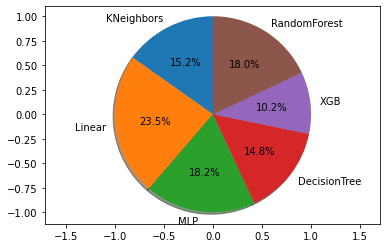

In [309]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels_acc = 'KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest'
acc = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
explode = (0, 0,0,0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(acc, explode=explode, labels=labels_acc, autopct='%1.1f%%',
        shadow=True, startangle=90, frame=True)
ax1.axis('equal') 
plt.show()

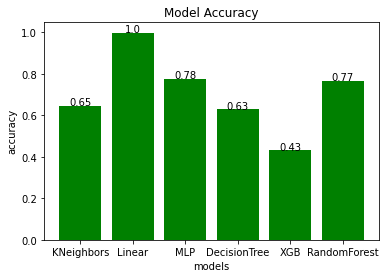

In [310]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,  y[i], y[i], ha = 'center')

if __name__ == '__main__':
    x = ['KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest']
    y = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
    y_=[float(f'{scoreknn:.2f}'),float(f'{scorelnr:.2f}'),float(f'{scoremlp:.2f}'),float(f'{scoredtr:.2f}'), float(f'{scorexgb:.2f}'),float(f'{scorerfr:.2f}')] 
    plt.bar(x, y,color='green')
    addlabels(x, y_)
    plt.title("Model Accuracy")
    plt.xlabel("models")
    plt.ylabel("accuracy")
    plt.show()



In [311]:
results = pd.DataFrame({'Real':ytest, 'Predicted':ypred})



results.head(50)

,Real,Predicted
10147,0.00,-0.000185
4322,0.00,-0.000201
13533,0.00,-0.000476
8113,0.01,0.009949
5766,0.00,-0.000227
2414,0.05,0.049881
7647,0.00,-0.000202
5961,0.02,0.019955
1553,0.52,0.519540
4496,0.06,0.049843


In [312]:
df_clean2 = df.drop(["Rank","Name"], axis=1)

df_clean2 = df_clean2.sort_values(["Year"])

df_clean2

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
258,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1766,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
5366,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...
16260,PS4,2016,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
16438,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [313]:
#Save all dataset to 

#top_sales = top_sales.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Sales.csv", index = True )

#top_genres = top_genres.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Genres.csv", index = True )

#top_platforms = top_platforms.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Platforms.csv", index = True )

#top_publisher = top_publisher.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Publisher.csv", index = True )

#publisher_year = publisher_year.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Publisher per Year.csv", index = True )

#publisher_10year = publisher_10year.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Publisher per 10 Years.csv", index = True )

#publisher_genres_all = publisher_genres_all.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Publisher Genres.csv", index = True )

#platform_year = platform_year.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Top Platform Years.csv", index = True )

#df_clean2 = df_clean2.to_csv(r"/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /Data/Df Clean.csv", index = True )